Install facebookphrophet

In [ ]:
!pip install fbprophet

**Now Upload and read the csv file**

In [ ]:
from google.colab import files
files.upload()

Saving gs.us (2).txt to gs.us (2).txt


{'gs.us (2).txt': b'Date,Open,High,Low,Close,Volume,OpenInt\r\n1999-05-04,67.665,68.78,62.329,62.659,24472946,0\r\n1999-05-05,62.213,62.213,58.991,61.547,8295140,0\r\n1999-05-06,60.542,61.773,59.712,60.488,3185852,0\r\n1999-05-07,60.488,66.671,59.429,65.998,5331091,0\r\n1999-05-10,65.331,65.441,62.549,62.941,2839054,0\r\n1999-05-11,62.329,63.389,61.885,62.888,2017182,0\r\n1999-05-12,63.216,66.671,61.547,65.441,2915697,0\r\n1999-05-13,65.222,67,64.555,65.166,1253094,0\r\n1999-05-14,63.444,64.329,61.491,62.497,2256860,0\r\n1999-05-17,61.547,62.549,60.542,61.098,2275059,0\r\n1999-05-18,60.77,62.714,60.662,61.098,1542762,0\r\n1999-05-19,61.773,62.158,61.218,61.71,797532,0\r\n1999-05-20,61.939,62.441,60.879,60.879,571013,0\r\n1999-05-21,60.662,61.274,60.107,60.107,1026465,0\r\n1999-05-24,59.656,59.878,57.872,58.154,1636945,0\r\n1999-05-25,57.096,58.71,56.986,57.432,1822679,0\r\n1999-05-26,58.427,59.32,56.146,58.819,1757445,0\r\n1999-05-27,57.872,60.323,57.598,60.323,1338175,0\r\n1999-05-28,

In [ ]:
import pandas as pd
df = pd.read_csv('gs.us (2).txt')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0
...,...,...,...,...,...,...,...
4656,2017-11-06,243.500,244.579,241.670,243.490,1733854,0
4657,2017-11-07,243.910,244.980,238.840,239.810,2435057,0
4658,2017-11-08,239.200,242.320,237.550,241.250,2349422,0
4659,2017-11-09,239.510,242.367,237.840,240.790,2122535,0


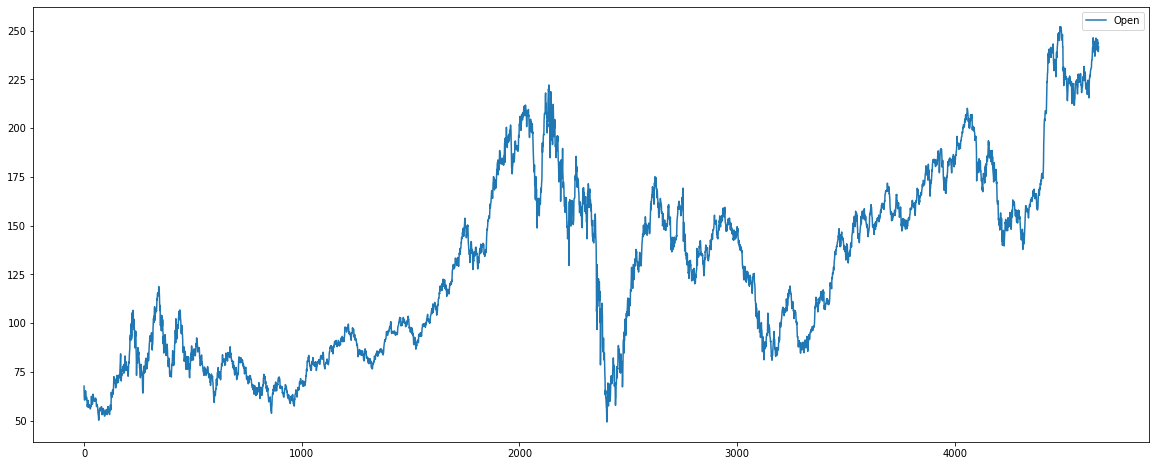

In [ ]:
from matplotlib import pyplot as plt
df[['Date','Open']].plot(figsize=(20,8))
plt.show()

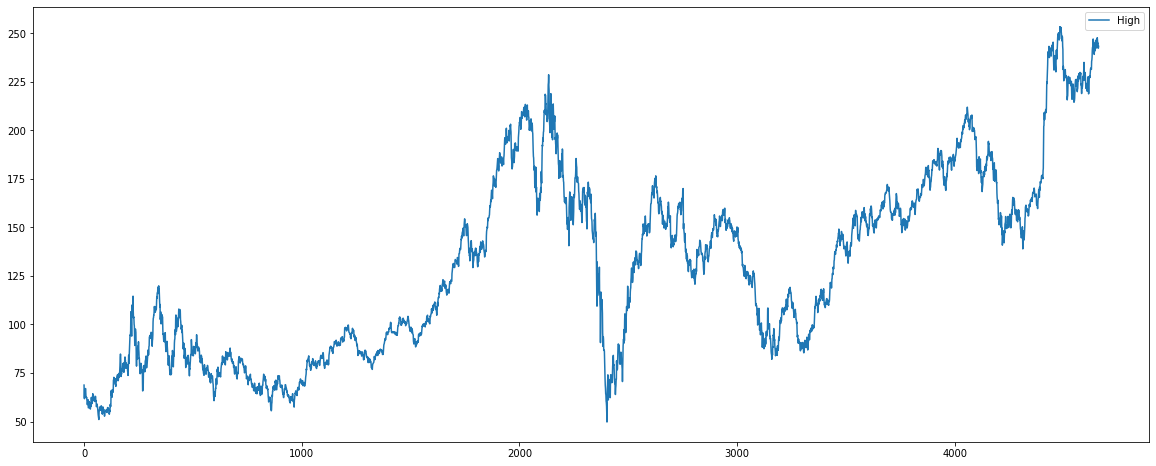

In [ ]:
from matplotlib import pyplot as plt
df[['Date','High']].plot(figsize=(20,8))
plt.show()

**Rename Date with ds and Open with y**

In [ ]:
df.rename(columns={'Date':'ds', 'Open':'y'}, inplace = True)

In [ ]:
from pandas import to_datetime
df['ds'] = to_datetime(df['ds'])
df.head()

,ds,y,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       4661 non-null   datetime64[ns]
 1   y        4661 non-null   float64       
 2   High     4661 non-null   float64       
 3   Low      4661 non-null   float64       
 4   Close    4661 non-null   float64       
 5   Volume   4661 non-null   int64         
 6   OpenInt  4661 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 255.0 KB


In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df

,ds,y,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0
...,...,...,...,...,...,...,...
4656,2017-11-06,243.500,244.579,241.670,243.490,1733854,0
4657,2017-11-07,243.910,244.980,238.840,239.810,2435057,0
4658,2017-11-08,239.200,242.320,237.550,241.250,2349422,0
4659,2017-11-09,239.510,242.367,237.840,240.790,2122535,0


In [ ]:
future_dates = model.make_future_dataframe(periods = 365)
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-05-04,57.116915,36.891772,77.391317,57.116915,57.116915,0.078633,0.078633,0.078633,-1.910049,-1.910049,-1.910049,1.988682,1.988682,1.988682,0.0,0.0,0.0,57.195548
1,1999-05-05,57.196033,38.725554,75.969876,57.196033,57.196033,-0.033030,-0.033030,-0.033030,-1.893819,-1.893819,-1.893819,1.860789,1.860789,1.860789,0.0,0.0,0.0,57.163003
2,1999-05-06,57.275151,36.002537,76.940591,57.275151,57.275151,0.014684,0.014684,0.014684,-1.697000,-1.697000,-1.697000,1.711684,1.711684,1.711684,0.0,0.0,0.0,57.289835
3,1999-05-07,57.354269,38.742442,77.583363,57.354269,57.354269,-0.227268,-0.227268,-0.227268,-1.770336,-1.770336,-1.770336,1.543068,1.543068,1.543068,0.0,0.0,0.0,57.127001
4,1999-05-10,57.591623,36.697126,76.711959,57.591623,57.591623,-0.867849,-0.867849,-0.867849,-1.811629,-1.811629,-1.811629,0.943780,0.943780,0.943780,0.0,0.0,0.0,56.723774


In [ ]:
future_dates = model.make_future_dataframe(periods = 365)
prediction = model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5021,2018-11-06,237.375089,208.892141,265.836630,214.908735,255.331450,-0.544628,-0.544628,-0.544628,-1.910049,-1.910049,-1.910049,1.365421,1.365421,1.365421,0.0,0.0,0.0,236.830460
5022,2018-11-07,237.421351,205.410239,265.306695,214.875970,255.468148,-0.607528,-0.607528,-0.607528,-1.893819,-1.893819,-1.893819,1.286291,1.286291,1.286291,0.0,0.0,0.0,236.813823
5023,2018-11-08,237.467613,206.657507,264.126877,214.843205,255.594369,-0.497533,-0.497533,-0.497533,-1.697000,-1.697000,-1.697000,1.199467,1.199467,1.199467,0.0,0.0,0.0,236.970080
5024,2018-11-09,237.513875,205.792290,265.650425,214.810440,255.720590,-0.662763,-0.662763,-0.662763,-1.770336,-1.770336,-1.770336,1.107573,1.107573,1.107573,0.0,0.0,0.0,236.851111
5025,2018-11-10,237.560136,214.071125,272.212511,214.777675,255.846812,5.554625,5.554625,5.554625,4.541417,4.541417,4.541417,1.013209,1.013209,1.013209,0.0,0.0,0.0,243.114762


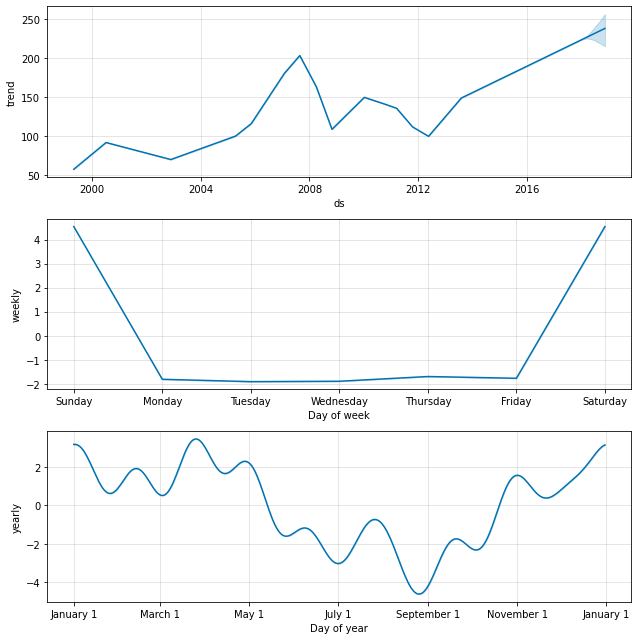

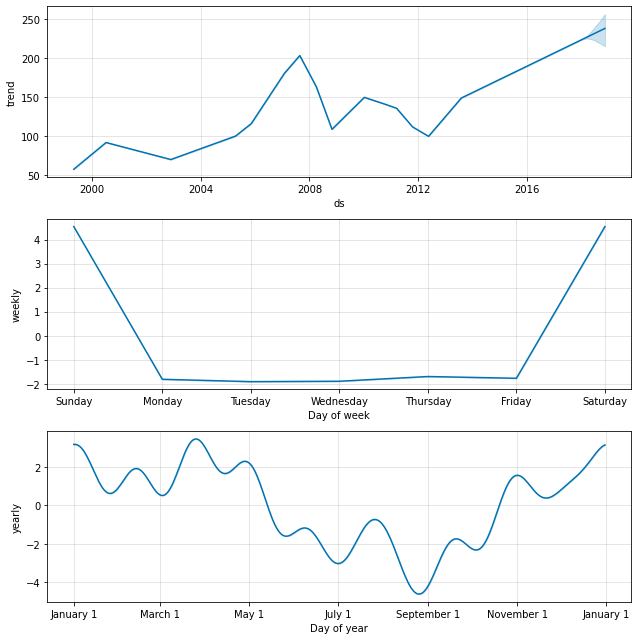

In [ ]:
model.plot_components(prediction)

In [ ]:
!pip install prophet

     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 184kB 34.2MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6640204 sha256=a0f3cabc39ae15baff89789ee89686c38aede6836b603c75051f510424bd81b6
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


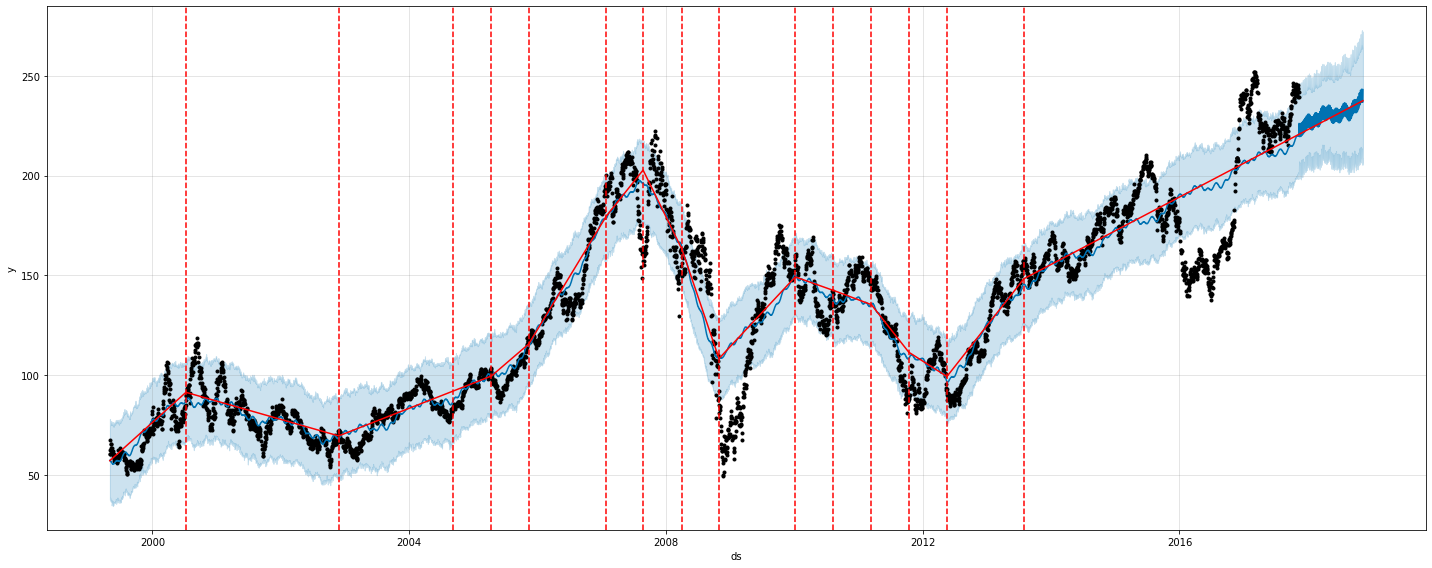

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(prediction, figsize = (20,8))
a = add_changepoints_to_plot(fig.gca(),model,prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv= cross_validation(model, initial = '3285 days', period = '180 days', horizon = '365 days')
cv.head()

INFO:fbprophet:Making 18 forecasts with cutoffs between 2008-06-25 00:00:00 and 2016-11-10 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-06-26,181.869881,167.958467,195.417998,163.27,2008-06-25
1,2008-06-27,182.151659,167.249453,197.003879,161.44,2008-06-25
2,2008-06-30,182.450685,168.400895,197.094982,160.12,2008-06-25
3,2008-07-01,182.583581,166.964394,196.837602,157.19,2008-06-25
4,2008-07-02,182.592002,167.703042,197.878844,161.25,2008-06-25


In [ ]:
from fbprophet.diagnostics import performance_metrics

p = performance_metrics(cv)
p.tail

<bound method NDFrame.tail of      horizon          mse       rmse        mae      mape     mdape  coverage
0    38 days  1113.440971  33.368263  27.482948  0.212578  0.193997  0.348820
1    39 days  1137.193164  33.722295  27.806015  0.214226  0.198644  0.346608
2    40 days  1162.110254  34.089738  28.167491  0.215969  0.199513  0.342518
3    41 days  1186.475761  34.445257  28.535976  0.217864  0.202212  0.336113
4    42 days  1191.302453  34.515250  28.607686  0.218358  0.202212  0.336283
..       ...          ...        ...        ...       ...       ...       ...
323 361 days  3635.006264  60.291013  53.473547  0.381404  0.378599  0.273599
324 362 days  3633.398132  60.277675  53.381658  0.381731  0.373114  0.275868
325 363 days  3627.831400  60.231482  53.210224  0.380564  0.376139  0.277655
326 364 days  3618.487104  60.153862  53.086301  0.379841  0.378599  0.277102
327 365 days  3623.640586  60.196683  53.107981  0.380052  0.378599  0.277570

[328 rows x 7 columns]>

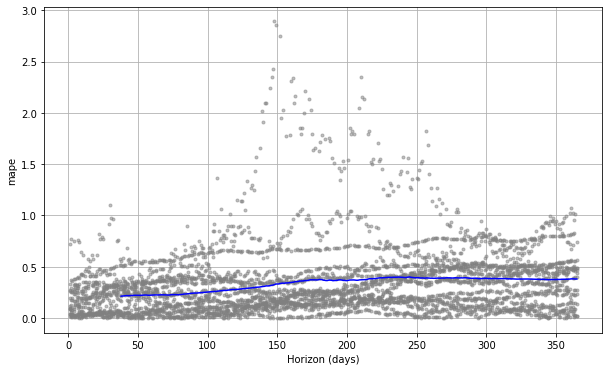

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(cv, metric = 'mape')